### Load and Prepare Stock Data

Load Stock Data Using yfinance:

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
import pandas as pd
import os

# Directory where the CSV files are stored
csv_dir = '/home/ayalk94/Documents/GitHub/week-long-challenge/Data/yfinance_data'

# List of CSV file names (replace with your actual file names)
csv_files = ['AAPL_historical_data.csv', 'AMZN_historical_data.csv', 'GOOG_historical_data.csv', 'META_historical_data.csv', 'MSFT_historical_data.csv', 'NVDA_historical_data.csv', 'TSLA_historical_data.csv']

# Initialize an empty list to store the DataFrames
dataframes = []

# Loop through each CSV file and load it into a DataFrame
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Option 1: Concatenate all the DataFrames into one DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)



# Display the first few rows of the combined DataFrame
print(combined_df.head())


         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [5]:


# Display basic information about the dataset
print(combined_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45428 entries, 0 to 45427
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          45428 non-null  object 
 1   Open          45428 non-null  float64
 2   High          45428 non-null  float64
 3   Low           45428 non-null  float64
 4   Close         45428 non-null  float64
 5   Adj Close     45428 non-null  float64
 6   Volume        45428 non-null  int64  
 7   Dividends     45428 non-null  float64
 8   Stock Splits  45428 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 3.1+ MB
None


In [13]:
# Display summary statistics for numeric columns
print(combined_df.describe())

               Open          High           Low         Close     Adj Close  \
count  45428.000000  45428.000000  45428.000000  45428.000000  45428.000000   
mean      46.798370     47.397792     46.190101     46.810590     45.367891   
std       78.259474     79.277620     77.218532     78.274673     78.049554   
min        0.034896      0.035547      0.033333      0.034115      0.031291   
25%        0.690500      0.708000      0.673541      0.693604      0.585204   
50%       13.646101     13.827710     13.463250     13.644750     13.076301   
75%       47.242501     47.720626     46.628125     47.193626     44.768961   
max      542.349976    542.809998    528.359985    539.909973    539.909973   

             Volume     Dividends  Stock Splits  
count  4.542800e+04  45428.000000  45428.000000  
mean   2.177785e+08      0.000847      0.002499  
std    3.076645e+08      0.022527      0.155291  
min    0.000000e+00      0.000000      0.000000  
25%    4.746455e+07      0.000000     

In [14]:
# Check for missing values
print(combined_df.isnull().sum())

# Drop rows with missing values in critical columns (e.g., Close price)
combined_df.dropna(subset=['Close'], inplace=True)

# Check for duplicate rows and remove them
combined_df.drop_duplicates(inplace=True)

# Ensure 'Date' is in datetime format
combined_df['Date'] = pd.to_datetime(combined_df['Date'], errors='coerce')

# Set 'Date' as the index for time series analysis
combined_df.set_index('Date', inplace=True)

# Display basic statistics of the combined data
print(combined_df.describe())


Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
               Open          High           Low         Close     Adj Close  \
count  45428.000000  45428.000000  45428.000000  45428.000000  45428.000000   
mean      46.798370     47.397792     46.190101     46.810590     45.367891   
std       78.259474     79.277620     77.218532     78.274673     78.049554   
min        0.034896      0.035547      0.033333      0.034115      0.031291   
25%        0.690500      0.708000      0.673541      0.693604      0.585204   
50%       13.646101     13.827710     13.463250     13.644750     13.076301   
75%       47.242501     47.720626     46.628125     47.193626     44.768961   
max      542.349976    542.809998    528.359985    539.909973    539.909973   

             Volume     Dividends  Stock Splits  
count  4.542800e+04  45428.000000  45428.000000  
mean   2.1777

### Data Distributions and Visualizations

#### Understanding the distribution of key variables such as Close, Volume, and their relationships helps in identifying any potential outliers or unusual patterns.

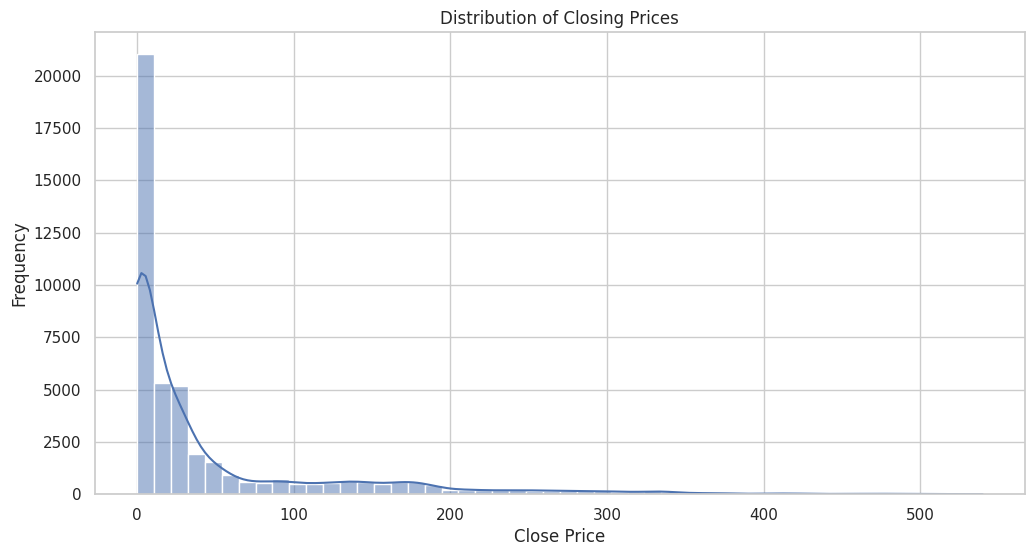

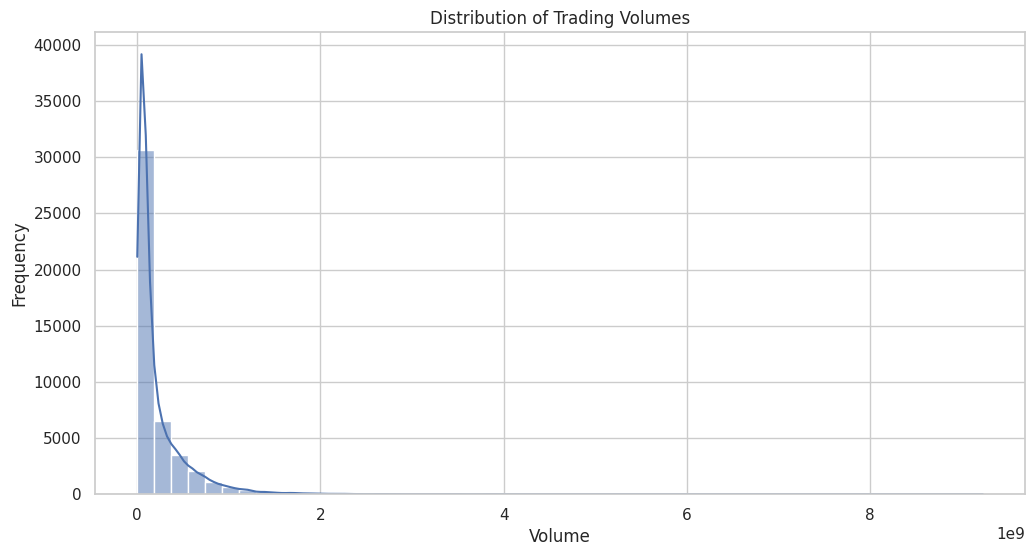

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configure Seaborn and plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Distribution of closing prices
sns.histplot(combined_df['Close'], bins=50, kde=True)
plt.title("Distribution of Closing Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

# Distribution of trading volumes
sns.histplot(combined_df['Volume'], bins=50, kde=True)
plt.title("Distribution of Trading Volumes")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()


### Time Series Visualization

##### Time series plots allow you to observe trends and patterns over time, such as trends in the closing price, trading volume, and volatility.

/home/ayalk94/Documents/GitHub/week-long-challenge/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


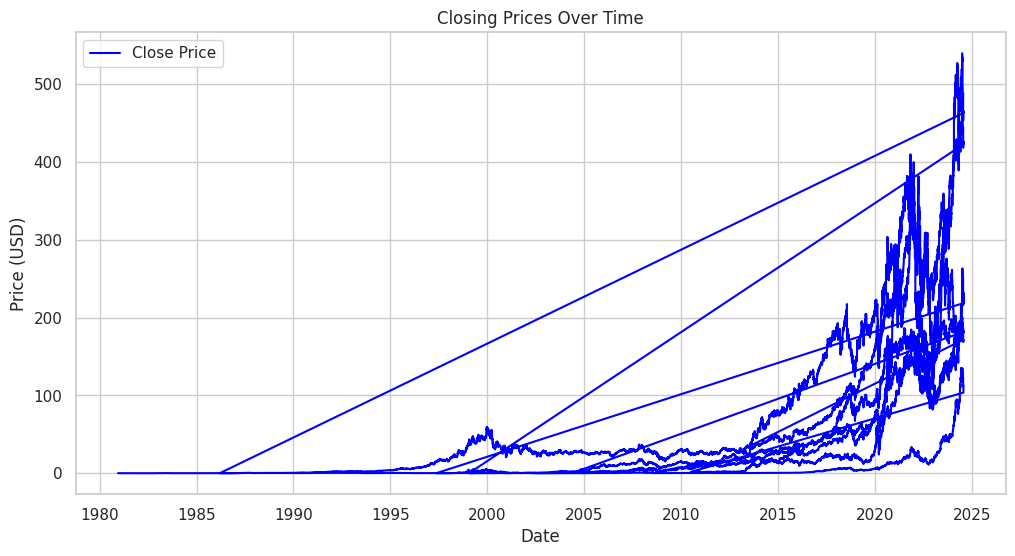

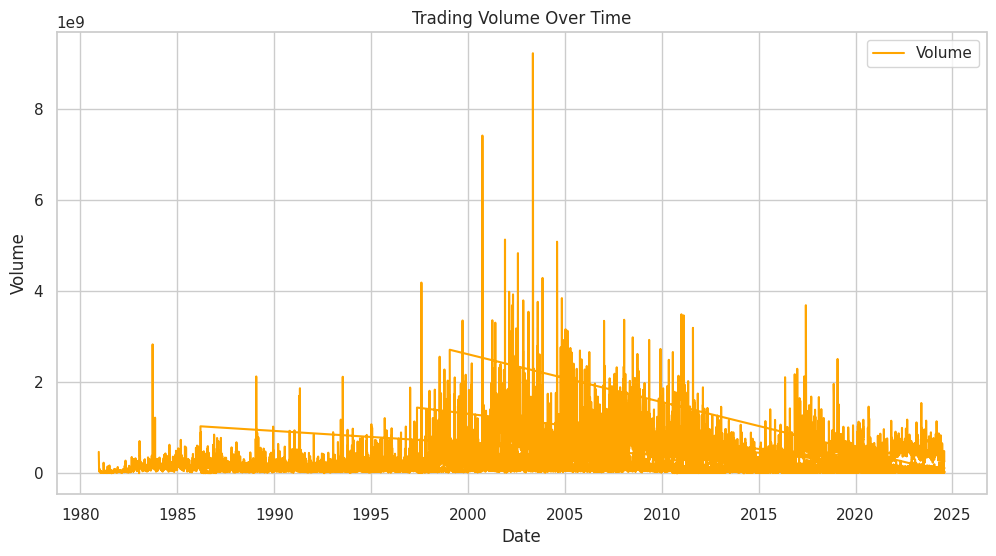

In [62]:
# Plot closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['Close'], label='Close Price', color='blue')
plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.show()

# Plot trading volumes over time
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['Volume'], label='Volume', color='orange')
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True)
plt.legend()
plt.show()


### Correlation Analysis

            Open      High       Low     Close    Volume
Open    1.000000  0.999894  0.999870  0.999762 -0.289218
High    0.999894  1.000000  0.999822  0.999877 -0.288655
Low     0.999870  0.999822  1.000000  0.999887 -0.289927
Close   0.999762  0.999877  0.999887  1.000000 -0.289275
Volume -0.289218 -0.288655 -0.289927 -0.289275  1.000000


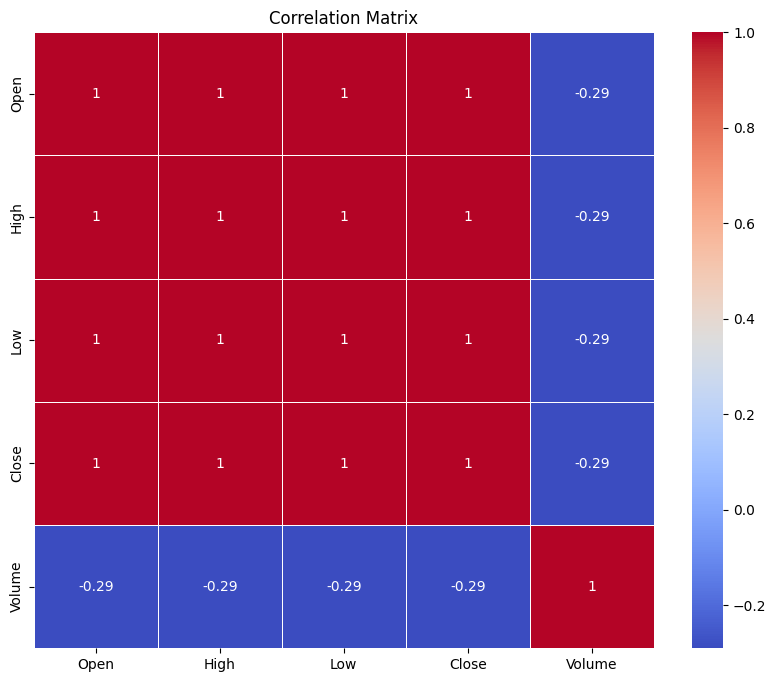

In [9]:
# Calculate the correlation matrix
correlation_matrix = combined_df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


### Rolling Statistics and Moving Averages

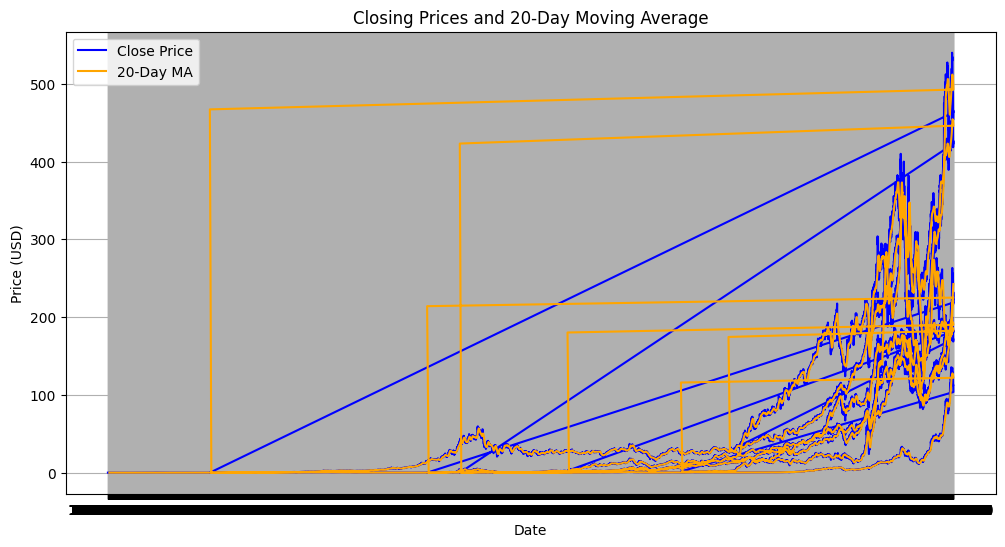

In [10]:
# Calculate 20-day moving average of closing prices
combined_df['20_MA'] = combined_df['Close'].rolling(window=20).mean()

# Plot the closing price with moving average
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Date'], combined_df['Close'], label='Close Price', color='blue')
plt.plot(combined_df['Date'], combined_df['20_MA'], label='20-Day MA', color='orange')
plt.title("Closing Prices and 20-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.show()


### Calculate Technical Indicators Using TA-Lib

#### I will calculate some common technical indicators. Here I will compute the Simple Moving Average (SMA) and the Relative Strength Index (RSI) using the TA-Lib library.

In [13]:
import talib as ta

# Calculate technical indicators on the combined data
combined_df['SMA'] = ta.SMA(combined_df['Close'], timeperiod=20)
combined_df['RSI'] = ta.RSI(combined_df['Close'], timeperiod=14)
combined_df['MACD'], combined_df['MACD_signal'], combined_df['MACD_hist'] = ta.MACD(combined_df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Display the first few rows of the combined data with indicators
print(combined_df[['Close', 'SMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist']].tail())


            Close         SMA        RSI       MACD  MACD_signal  MACD_hist
45423  215.990005  237.924999  44.886918  11.789291    15.873789  -4.084498
45424  220.250000  239.118999  46.951389   9.353206    14.569672  -5.216466
45425  219.800003  240.238000  46.752165   7.302106    13.116159  -5.814053
45426  232.100006  241.949000  52.664511   6.593101    11.811547  -5.218447
45427  222.619995  242.587000  48.220474   5.206237    10.490485  -5.284248


### Visualize the Data

#### visualize the stock price along with the SMA, RSI, and MACD indicators.

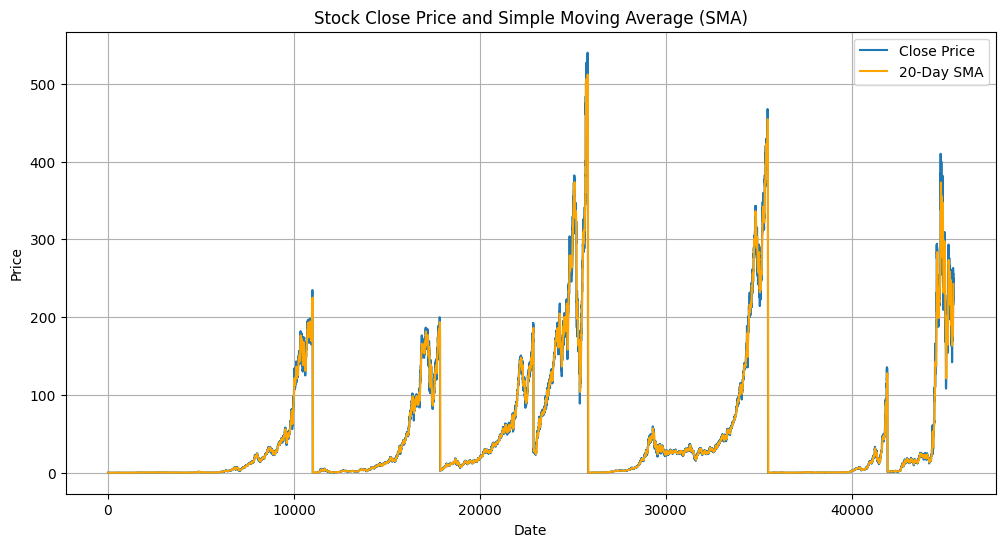

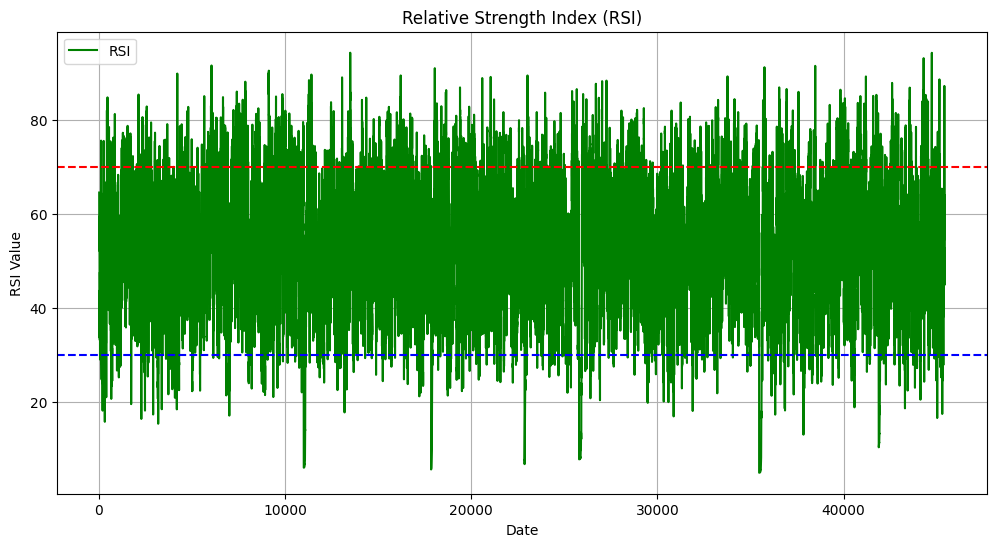

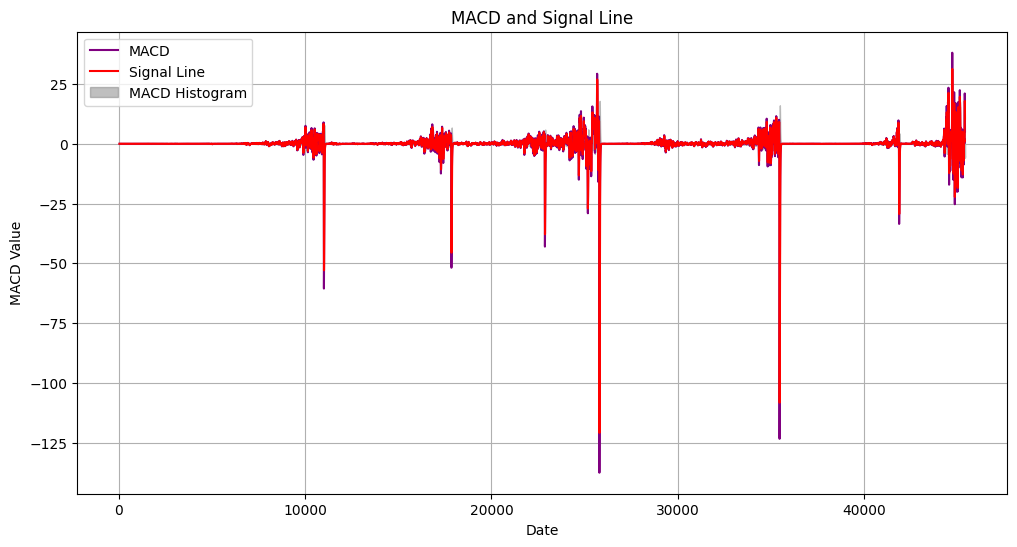

In [14]:
import matplotlib.pyplot as plt

# Plot Close price and Simple Moving Average (SMA)
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['Close'], label='Close Price')
plt.plot(combined_df.index, combined_df['SMA'], label='20-Day SMA', color='orange')
plt.title('Stock Close Price and Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot Relative Strength Index (RSI)
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['RSI'], label='RSI', color='green')
plt.axhline(y=70, color='red', linestyle='--')  # Overbought threshold
plt.axhline(y=30, color='blue', linestyle='--')  # Oversold threshold
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.grid(True)
plt.legend()
plt.show()

# Plot MACD and Signal Line
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['MACD'], label='MACD', color='purple')
plt.plot(combined_df.index, combined_df['MACD_signal'], label='Signal Line', color='red')
plt.fill_between(combined_df.index, combined_df['MACD_hist'], 0, alpha=0.5, label='MACD Histogram', color='gray')
plt.title('MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.grid(True)
plt.legend()
plt.show()
